In [1]:
import numpy as np
import matplotlib.pyplot as pp
import importlib
import metropolis as met
%matplotlib widget

pp.rcParams.update({
    "text.usetex": True,
})


In [ ]:
importlib.reload(met)

In [ ]:

xmin, xmax = -10, 10
x0 = np.random.uniform(xmin, xmax)
x_dat1 = [x0]
x_dat2 = [x0]
x_dat3 = [x0]

Ns = [5_00, 5_000, 50_000]
for n,x_dat in enumerate((x_dat1, x_dat2, x_dat3)):
    N = Ns[n]
    x = x_dat[0]
    for n in range(N):
        x = met.iterate(x)
        x_dat.append(x)

In [ ]:

fig, ax = pp.subplots()

xx = np.linspace(-7,7,1000)
ax.plot(xx, met.f(xx)/np.trapz(met.f(xx),x=xx), 
        color='k', linewidth=2, alpha=0.5,
        label="$P(x)$"

       )


for n,x_dat in enumerate((x_dat1, x_dat2, x_dat3)):
    x_dat = np.array(x_dat)
    #ax2 = ax.twinx(sharey=True)
    bins = np.arange(-7,7.1, 0.25)
    ax.hist(x_dat,  bins=bins, 
            density=True,
            histtype='step',
            alpha=1,
            linewidth = 2,
            label=f"N = {Ns[n]}"
           )
    
ax.legend(fontsize=12)
ax.set_xlabel("$x$", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)

In [ ]:
fig.savefig("../../res/multiple_histograms.png", dpi=600)

# Test output of `metropolis.py`

In [ ]:
x_dat = np.loadtxt('output.dat')
fig, ax = pp.subplots()

xx = np.linspace(-7,7,1000)
ax.plot(xx, met.f(xx)/np.trapz(met.f(xx),x=xx), 
        color='k', linewidth=2, alpha=0.5,
        label="$P(x)$"

       )

x_dat = np.array(x_dat)
#ax2 = ax.twinx(sharey=True)
bins = np.arange(-7,7.1, 0.25)
ax.hist(x_dat,  bins=bins, 
        density=True,
        histtype='step',
        alpha=1,
        linewidth = 2,
        label=f"N = {Ns[n]}"
       )

# Plot just the P(x)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

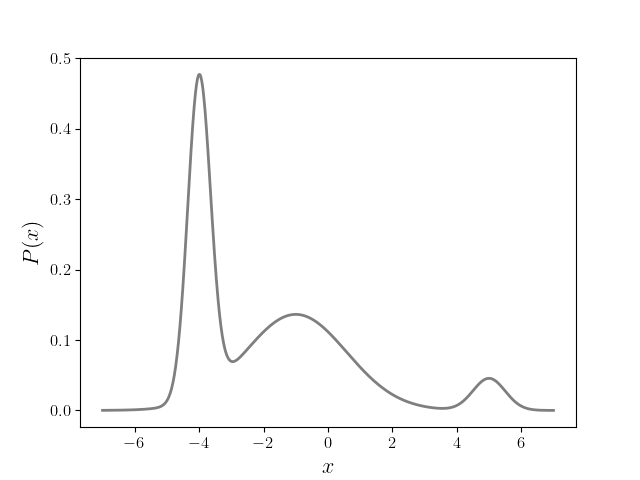

In [4]:
fig, ax = pp.subplots()

xx = np.linspace(-7,7,1000)
ax.plot(xx, met.f(xx)/np.trapz(met.f(xx),x=xx), 
        color='k', linewidth=2, alpha=0.5,
       )

ax.set_xlabel("$x$", fontsize=16)
ax.set_ylabel("$P(x)$", fontsize=16)
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)

In [5]:
fig.savefig("../../res/plot_of_P.png", dpi=600)